In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load csv and make DataFrame 
sales_df = pd.read_csv('superstore_dataset_2011-2015.csv',encoding = "ISO-8859-1")

sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [3]:
#rows and columns of DataFrame
sales_df.shape

(51290, 24)

In [14]:
# Data type of DataFrame
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

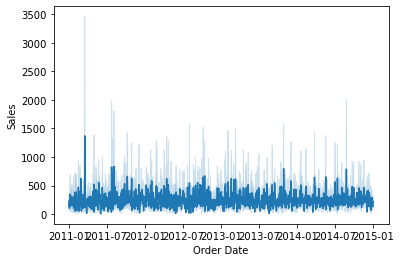

In [15]:
#sns.lineplot(x="Order Date",y="Sales",data=sales_df)


In [18]:
#plt.plot(x="Order Date",y="Sales",data=sales_df)
#plt.show()

In [13]:
#change the "Order Date" and "Ship Date" columns to datetime
sales_df[["Order Date", "Ship Date"]] = sales_df[["Order Date", "Ship Date"]].apply(pd.to_datetime)
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [24]:
#DataFrame of the profits by category
category_df=sales_df.groupby(["Category","Sub-Category"])["Sales","Quantity","Discount","Shipping Cost","Profit"].sum()
category_df

C:\Users\ahsen\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Sales  Quantity  Discount  Shipping Cost  \
Category        Sub-Category                                                    
Furniture       Bookcases     1.466572e+06      8310   370.710      155482.23   
                Chairs        1.501682e+06     12336   560.120      164229.85   
                Furnishings   3.855783e+05     11225   478.880       40747.12   
                Tables        7.570419e+05      3083   250.320       79861.46   
Office Supplies Appliances    1.011064e+06      6078   248.700      108300.78   
                Art           3.720920e+05     16301   573.080       41287.47   
                Binders       4.619115e+05     21429  1102.480       48181.99   
                Envelopes     1.709043e+05      8380   320.810       18547.78   
                Fasteners     8.324232e+04      8390   340.240        9053.59   
                Labels        7.340403e+04      9322   313.890        8059.88   
                Paper         2.442917e+05     12822   387.300       26661.29   
                Storage       1.127086e+06     16917   700.490      120546.46   
                Supplies      2.430742e+05      8543   310.200       24812.05   
Technology      Accessories   7.492370e+05     10946   370.480       83513.58   
                Copiers       1.509436e+06      7454   260.418      159496.49   
                Machines      7.790601e+05      4906   252.000       79135.90   
                Phones        1.706824e+06     11870   489.610      184902.77   

                                    Profit  
Category        Sub-Category                
Furniture       Bookcases     161924.41950  
                Chairs        140396.26750  
                Furnishings    46967.42550  
                Tables        -64083.38870  
Office Supplies Appliances    141680.58940  
                Art            57953.91090  
                Binders        72449.84600  
                Envelopes      29601.11630  
                Fasteners      11525.42410  
                Labels         15010.51200  
                Paper          59207.68270  
                Storage       108461.48980  
                Supplies       22583.26310  
Technology      Accessories   129626.30620  
                Copiers       258567.54818  
                Machines       58867.87300  
                Phones        216717.00580

In [28]:
country_df=sales_df.groupby(["Country"])["Sales","Quantity","Discount","Shipping Cost","Profit"].sum().reset_index()
country_df

C:\Users\ahsen\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Country,Sales,Quantity,Discount,Shipping Cost,Profit
0,Afghanistan,21673.32000,228,0.000,2300.23,5460.30000
1,Albania,3888.12000,40,0.000,698.57,709.32000
2,Algeria,36091.59000,454,0.000,3726.41,9106.50000
3,Angola,25554.00000,317,0.000,2418.40,6494.97000
4,Argentina,57511.78328,1504,168.952,6366.51,-18693.79672
...,...,...,...,...,...,...
142,Venezuela,26587.82956,774,79.426,2810.06,-11222.71044
143,Vietnam,65800.19940,996,63.450,7684.37,-1870.23060
144,Yemen,2465.71200,71,21.000,286.63,-3706.45800
145,Zambia,26035.50000,251,0.000,3067.20,7001.73000


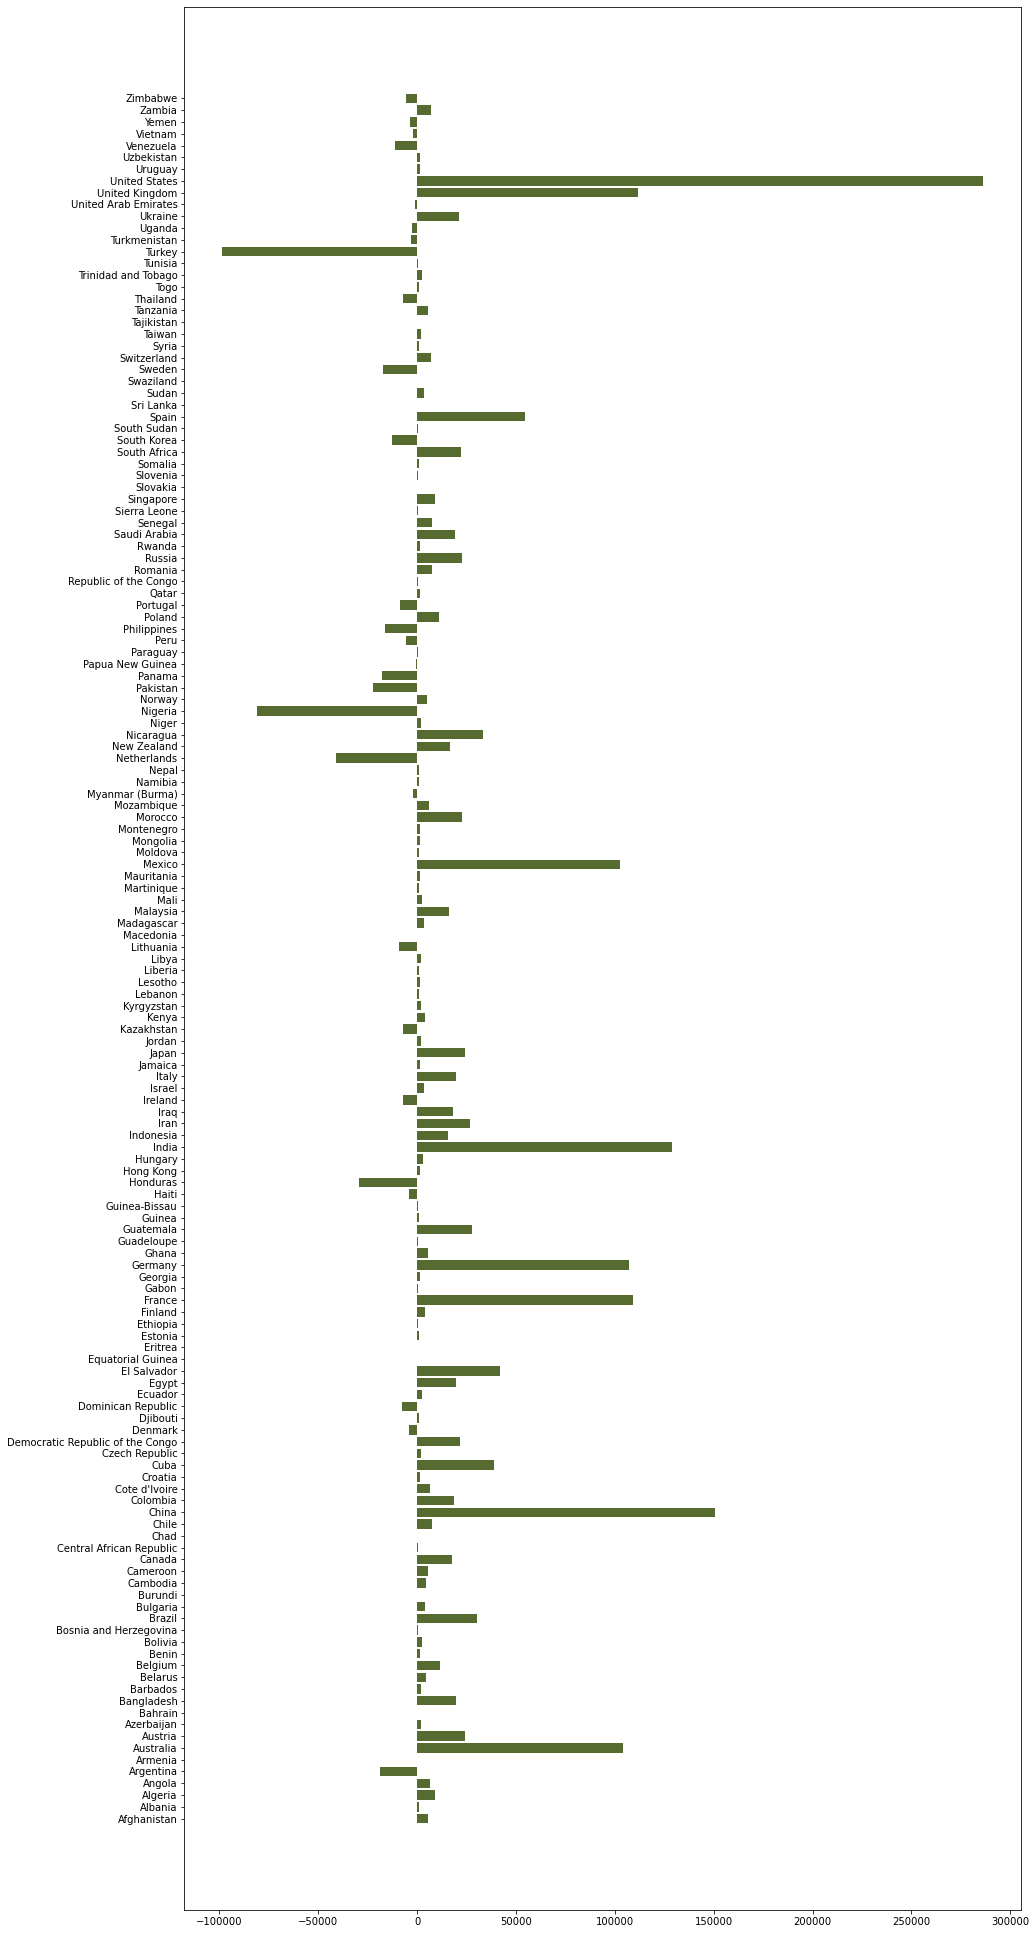

In [74]:
plt.figure(figsize=(15,35))
plt.barh(y="Country",width="Profit",data=country_df,color="darkolivegreen")

plt.show()

In [46]:
profit_df=country_df.loc[country_df["Profit"]>0].sort_values(["Profit"],ascending=False)
profit_df

,Country,Sales,Quantity,Discount,Shipping Cost,Profit
139,United States,2.297201e+06,37873,1561.09,238173.79,286397.0217
26,China,7.005620e+05,7081,26.90,78957.02,150683.0850
57,India,5.896501e+05,5758,27.50,61780.72,129071.8350
138,United Kingdom,5.285763e+05,6161,107.30,53580.27,111900.1500
44,France,8.589311e+05,10804,204.35,95387.81,109029.0030
...,...,...,...,...,...,...
40,Eritrea,1.877400e+02,4,0.00,8.55,76.2000
5,Armenia,1.567500e+02,3,0.00,13.50,69.0900
39,Equatorial Guinea,1.505100e+02,3,0.00,9.38,44.4600
75,Macedonia,2.096400e+02,6,0.00,19.17,43.3800


In [69]:
profit_df.to_csv("profit_csv")

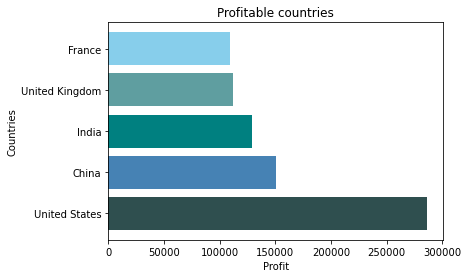

In [77]:
import matplotlib.colors as mcolors
#plt.figure(figsize=(15,35))
plt.barh(y="Country",width="Profit",color=['darkslategrey', 'steelblue', 'teal', 'cadetblue', 'skyblue'],data=profit_df.head())
plt.title("Profitable countries")
plt.ylabel('Countries')
plt.xlabel('Profit')
plt.savefig("profit.png")
plt.show()

In [48]:
loss_df=country_df.loc[country_df["Profit"]<=0].sort_values(["Profit"],ascending=True)
loss_df.head()

,Country,Sales,Quantity,Discount,Shipping Cost,Profit
133,Turkey,108507.9480,3024,826.800,11664.16,-98447.2320
94,Nigeria,54350.3520,2056,633.500,6183.11,-80750.7180
90,Netherlands,77514.9450,1682,209.600,9005.75,-41070.0750
54,Honduras,90125.6486,2556,290.072,9671.80,-29482.3714
96,Pakistan,58872.6120,948,110.700,5833.09,-22446.6480


In [57]:
loss_df.to_csv("loss.csv")

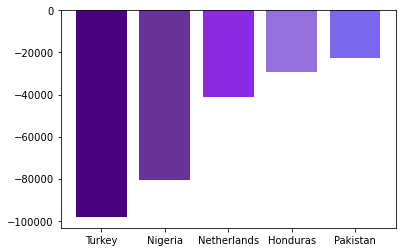

In [68]:
#plt.figure(figsize=(15,35))
plt.bar(x="Country",height="Profit",color=['indigo', 'rebeccapurple', 'blueviolet', 'mediumpurple', 'mediumslateblue'],data=loss_df.head())

plt.show()